<a href="https://colab.research.google.com/github/dileep9968/fake-news-detection-using-distilber-mobilebert-tinybert/blob/main/fake_news_detection_using_distilber_mobilebert_tinybert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install datasets
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 7.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
df = pd.read_excel('https://github.com/laxmimerit/All-CSV-ML-Data-Files-Download/raw/master/fake_news.xlsx')

In [3]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
df.isnull().sum()

,0
id,0
title,558
author,1957
text,43
label,0


In [5]:
df = df.dropna()
df.isnull().sum()

,0
id,0
title,0
author,0
text,0
label,0


In [6]:
df.shape

(18281, 5)

In [7]:
df['label'].value_counts()

,count
label,
0,10361
1,7920


## Dataset Analysis

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Frequency')

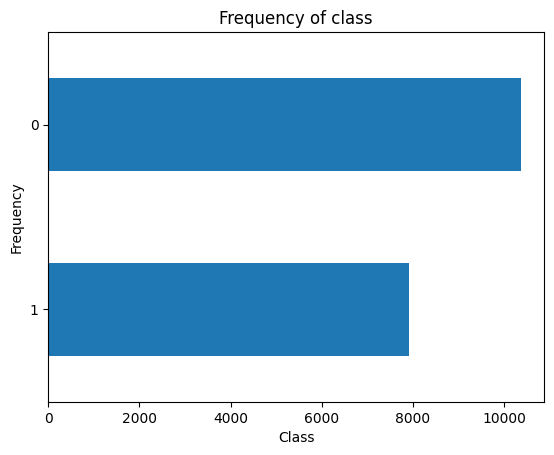

In [9]:
label_counts = df['label'].value_counts(ascending=True)
label_counts.plot.barh()
plt.title('Frequency of class')
plt.xlabel('Class')
plt.ylabel('Frequency')

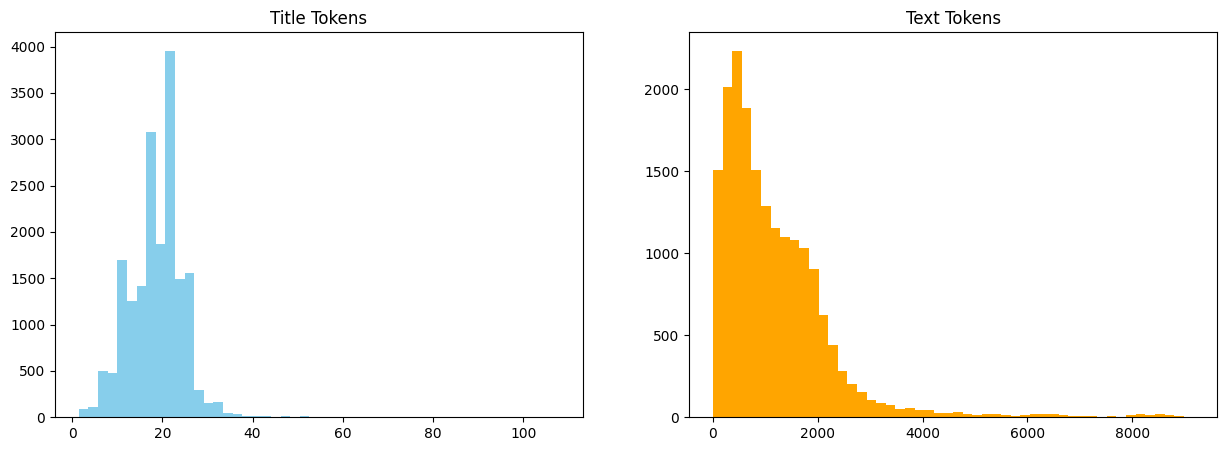

In [10]:
df['title_token']=df['title'].apply(lambda x:len(x.split())*1.5)
df['text_token']=df['text'].apply(lambda x:len(x.split())*1.5)

fig, ax= plt.subplots(1,2,figsize=(15,5))
ax[0].hist(df['title_token'], bins=50, color='skyblue')
ax[0].set_title('Title Tokens')
ax[1].hist(df['text_token'], bins = 50, color = 'orange')
ax[1].set_title('Text Tokens')
plt.show()


## Data Loader and Train Test Split

In [11]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3, stratify = df['label'],random_state=42)
test, valid = train_test_split(test, test_size=1/3,stratify = test['label'], random_state=42)


In [12]:
from datasets import Dataset, DatasetDict

dataset = DatasetDict({
    'train': Dataset.from_pandas(train, preserve_index=False),
    'test': Dataset.from_pandas(test, preserve_index = False),
    'valid': Dataset.from_pandas(valid, preserve_index =False)
})
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'author', 'text', 'label', 'title_token', 'text_token'],
        num_rows: 12796
    })
    test: Dataset({
        features: ['id', 'title', 'author', 'text', 'label', 'title_token', 'text_token'],
        num_rows: 3656
    })
    valid: Dataset({
        features: ['id', 'title', 'author', 'text', 'label', 'title_token', 'text_token'],
        num_rows: 1829
    })
})

## Data Tokenization

In [13]:
from transformers import AutoTokenizer
text = 'Machine learning is awesome!! Thanks KGP Talkie'

model_ckpt = 'distilbert-base-uncased'
distilbert_tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
distilbert_tokens = distilbert_tokenizer(text)

model_ckpt = 'google/mobilebert-uncased'
mobilebert_tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
mobilebert_tokens = mobilebert_tokenizer(text)

model_ckpt = 'huawei-noah/TinyBERT_General_4L_312D'
tinybert_tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
tinybert_tokens = tinybert_tokenizer(text)



tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/847 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/409 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [14]:
distilbert_tokenizer, mobilebert_tokenizer, tinybert_tokenizer

(DistilBertTokenizerFast(name_or_path='distilbert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=False),  added_tokens_decoder={
 	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
 	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
 	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
 	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
 	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
 },
 MobileBertTokenizerFast(name_or_path='google/mobilebert-uncased', vocab_size=30522, model_max_length=1000

In [15]:
def tokenize(batch):
  return distilbert_tokenizer(batch['title'], padding=True, truncation=True)

print(tokenize(dataset['train'][:2]))

{'input_ids': [[101, 6221, 8398, 22577, 4769, 28667, 9331, 102], [101, 2006, 1996, 2769, 4446, 102, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 0, 0]]}


In [16]:
encoded_dataset = dataset.map(tokenize, batch_size = None, batched=True)


Map:   0%|          | 0/12796 [00:00<?, ? examples/s]

Map:   0%|          | 0/3656 [00:00<?, ? examples/s]

Map:   0%|          | 0/1829 [00:00<?, ? examples/s]

## Model Building

In [17]:
from transformers import AutoModelForSequenceClassification, AutoConfig
import torch

label2id = {"Real":0,"Fake":1}
id2label = {0:"Real",1:"Fake"}

model_ckpt = 'distilbert-base-uncased'
num_labels = len(label2id)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
config = AutoConfig.from_pretrained(model_ckpt, id2label=id2label, label2id = label2id)
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, config = config).to(device)




model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [18]:
model.config

DistilBertConfig {
  "_attn_implementation_autoset": true,
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "id2label": {
    "0": "Real",
    "1": "Fake"
  },
  "initializer_range": 0.02,
  "label2id": {
    "Fake": 1,
    "Real": 0
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.46.3",
  "vocab_size": 30522
}

## Model Traning or FineTunning

In [19]:
#!pip install evaluate
import numpy as np
import evaluate

accuracy= evaluate.load('accuracy')
def compute_metrics(eval_pred):
  predictions, labels = eval_pred
  predictions = np.argmax(predictions, axis=1)
  return accuracy.compute(predictions=predictions, references=labels)

In [20]:
from transformers import TrainingArguments, Trainer
batch_size = 16
train_dir = 'train_dir'

traning_args = TrainingArguments(
    output_dir = train_dir,
    num_train_epochs = 2,
    learning_rate = 2e-5,
    per_device_train_batch_size = batch_size,
    per_device_eval_batch_size = batch_size,
    weight_decay = 0.01,
    evaluation_strategy = 'epoch',
    disable_tqdm = False)


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [21]:
trainer = Trainer(model = model,
                  compute_metrics=compute_metrics,
                  train_dataset = encoded_dataset['train'],
                  eval_dataset = encoded_dataset['valid'])

In [22]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Step,Training Loss
500,0.246600
1000,0.161100
1500,0.135600
2000,0.090300
2500,0.070800
3000,0.072800
3500,0.058900
4000,0.028900
4500,0.024600


TrainOutput(global_step=4800, training_loss=0.0942012478907903, metrics={'train_runtime': 520.4476, 'train_samples_per_second': 73.76, 'train_steps_per_second': 9.223, 'total_flos': 953467218676224.0, 'train_loss': 0.0942012478907903, 'epoch': 3.0})

## Model Evaluation

In [23]:
#!pip install evaluate

In [24]:
preds_output = trainer.predict(encoded_dataset['test'])
preds_output

PredictionOutput(predictions=array([[-4.310463 ,  4.1445723],
       [-4.3730745,  4.1309886],
       [ 5.6616573, -5.478299 ],
       ...,
       [-4.149719 ,  3.990599 ],
       [-4.3392534,  4.1724043],
       [ 5.648886 , -5.4637604]], dtype=float32), label_ids=array([1, 1, 0, ..., 1, 1, 0]), metrics={'test_loss': 0.18742306530475616, 'test_accuracy': 0.9638949671772429, 'test_runtime': 9.3753, 'test_samples_per_second': 389.962, 'test_steps_per_second': 48.745})

In [25]:
preds_output.metrics

{'test_loss': 0.18742306530475616,
 'test_accuracy': 0.9638949671772429,
 'test_runtime': 9.3753,
 'test_samples_per_second': 389.962,
 'test_steps_per_second': 48.745}

In [26]:
import numpy as np
y_pred = np.argmax(preds_output.predictions, axis=1)
y_true = encoded_dataset['test'][:]['label']


In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names = list(label2id)))

              precision    recall  f1-score   support

        Real       0.97      0.96      0.97      2072
        Fake       0.95      0.96      0.96      1584

    accuracy                           0.96      3656
   macro avg       0.96      0.96      0.96      3656
weighted avg       0.96      0.96      0.96      3656



## Benchmarking

In [28]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
  label = pred.label_ids
  preds = pred.predictions.argmax(-1)

  f1 = f1_score(label, preds, average = 'weighted')
  acc = accuracy_score(label, preds)
  return {'accuracy':acc, 'f1':f1}

In [43]:
model_dict = {
    'bert-base':'bert-base-uncased',
    'distilber':'distilbert-base-uncased',
    'mobilebert':'google/mobilebert-uncased',
    'tinybert':'huawei-noah/TinyBERT_General_4L_312D'
}

def train_model(model_name):
  model_ckpt = model_dict[model_name]
  tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
  config = AutoConfig.from_pretrained(model_ckpt, id2label=id2label, label2id = label2id)
  model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, config = config).to(device)

  def tokenize(batch):
    return tokenizer(batch['title'], padding=True, truncation=True)

  encoded_dataset = dataset.map(tokenize, batch_size = None, batched=True)
  batch_size = 16
  train_dir = 'train_dir'

  traning_args = TrainingArguments(
    output_dir = train_dir,
    num_train_epochs = 2,
    learning_rate = 2e-5,
    per_device_train_batch_size = batch_size,
    per_device_eval_batch_size = batch_size,
    weight_decay = 0.01,
    evaluation_strategy = 'epoch',
    disable_tqdm = False)


  trainer = Trainer(
      model = model,
      compute_metrics = compute_metrics,
      train_dataset = encoded_dataset['train'],
      eval_dataset = encoded_dataset['valid'],
      tokenizer = tokenizer,
      args = traning_args
  )

  trainer.train()

  preds = trainer.predict(encoded_dataset['test'])
  print(preds.metrics)

model_performance = {}
for model_name in model_dict:
  print(f'Training {model_name}')
  result = train_model(model_name)
  model_performance[model_name] = result



Training bert-base


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/12796 [00:00<?, ? examples/s]

Map:   0%|          | 0/3656 [00:00<?, ? examples/s]

Map:   0%|          | 0/1829 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-43-a793f9efcf57>:32: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.211000,0.126058,0.946966,0.946796
2,0.083400,0.160883,0.956260,0.956303


{'test_loss': 0.14712990820407867, 'test_accuracy': 0.9636214442013129, 'test_f1': 0.9636558679699326, 'test_runtime': 17.599, 'test_samples_per_second': 207.739, 'test_steps_per_second': 13.012}
Training distilber


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/12796 [00:00<?, ? examples/s]

Map:   0%|          | 0/3656 [00:00<?, ? examples/s]

Map:   0%|          | 0/1829 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-43-a793f9efcf57>:32: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.206800,0.138276,0.950793,0.950687
2,0.081500,0.148482,0.957900,0.957910


{'test_loss': 0.14671725034713745, 'test_accuracy': 0.9603391684901532, 'test_f1': 0.9603687506675047, 'test_runtime': 8.6979, 'test_samples_per_second': 420.33, 'test_steps_per_second': 26.328}
Training mobilebert


pytorch_model.bin:   0%|          | 0.00/147M [00:00<?, ?B/s]

Some weights of MobileBertForSequenceClassification were not initialized from the model checkpoint at google/mobilebert-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/12796 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map:   0%|          | 0/3656 [00:00<?, ? examples/s]

Map:   0%|          | 0/1829 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-43-a793f9efcf57>:32: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,11327.783000,1.675457,0.875342,0.874668
2,42.350300,0.165718,0.940405,0.940615


{'test_loss': 43.40378952026367, 'test_accuracy': 0.9447483588621444, 'test_f1': 0.9449532883937823, 'test_runtime': 9.5934, 'test_samples_per_second': 381.095, 'test_steps_per_second': 23.871}
Training tinybert


pytorch_model.bin:   0%|          | 0.00/62.7M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at huawei-noah/TinyBERT_General_4L_312D and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/12796 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map:   0%|          | 0/3656 [00:00<?, ? examples/s]

Map:   0%|          | 0/1829 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-43-a793f9efcf57>:32: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.311600,0.230504,0.912521,0.911407
2,0.144800,0.189032,0.936031,0.935734


{'test_loss': 0.17975908517837524, 'test_accuracy': 0.937089715536105, 'test_f1': 0.9369546060556728, 'test_runtime': 1.8336, 'test_samples_per_second': 1993.852, 'test_steps_per_second': 124.888}


In [44]:
model_performance

{'bert-base': None, 'distilber': None, 'mobilebert': None, 'tinybert': None}

## Save and load model

In [45]:
trainer.save_model('fake_news')